# **Progression of Renewable Energy**



> <font size="4">A transition to clean energy is about making an investment in our future - Gloria Rubens </font>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('owid-energy-data.csv')

# Renewables vs Fossil Fuels

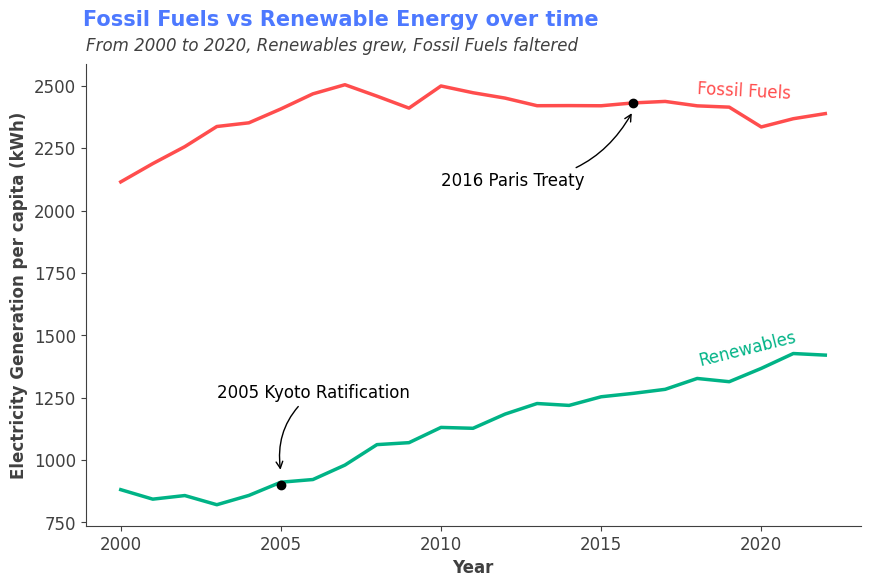

In [4]:
df_copy = df.copy()

df_filtered = df_copy[df_copy['iso_code'].notna() &
                      (df['year'] >= 2000) &
                      (df['year'] <= 2022)]

fossil_fuel_columns = [col for col in df_filtered.columns if col.startswith('fossil')]
renewables_columns = [col for col in df_filtered.columns if col.startswith('renewables')]

df_filtered_1 = df_filtered[['country', 'year'] + fossil_fuel_columns + renewables_columns]

df_filtered_1 = df_filtered[['country', 'year', 'fossil_elec_per_capita', 'renewables_elec_per_capita']]

year_avg_dict = {}
for years in df_filtered_1['year'].unique():
    df_filtered_year = df_filtered_1[df_filtered_1['year'] == years]
    avg_value_fossil = df_filtered_year['fossil_elec_per_capita'].mean()
    avg_value_renewable = df_filtered_year['renewables_elec_per_capita'].mean()
    year_avg_dict[str(years)] = (float(avg_value_fossil), float(avg_value_renewable))


df_averaged = pd.DataFrame.from_dict(year_avg_dict, orient='index', columns=['avg_value_fossil', 'avg_value_renewable'])

df_averaged.reset_index(inplace=True)
df_averaged.rename(columns={'index': 'year'}, inplace=True)

#plotting the main plot
fig,ax = plt.subplots(figsize=(10, 6))
ax.plot(df_averaged['year'].astype(int),
        df_averaged['avg_value_fossil'],
        color = '#ff4d4d',
        linewidth = 2.5)

ax.plot(df_averaged['year'].astype(int),
        df_averaged['avg_value_renewable'],
        color = '#00b386',
        linewidth = 2.5)

ax.set_xlabel('Year',
              loc = 'center',
              fontdict = {'fontsize':'12',
                          'fontfamily':'sans-serif',
                          'fontweight':'bold'},
              color = '#404040')


ax.set_ylabel('Electricity Generation per capita (kWh)',
              loc = 'center',
              fontdict = {'fontsize':'12',
                          'fontfamily':'sans-serif',
                          'fontweight':'bold'},
              color = '#404040')



#annotation and arrow
ax.plot(2005, 900, 'o', color = 'black')
ax.annotate('2005 Kyoto Ratification',
            xy = (2005,950),
            xytext=(2003, 1250),
            arrowprops={'facecolor':'#80bfff',
                        'arrowstyle':'->',
                        'connectionstyle':'arc3, rad = 0.3',
                        },
            #bbox = {'boxstyle':'round4',
            #        'fc':'w'},
            fontsize = 12,
            color = 'black')

ax.plot(2016, 2430, 'o', color = 'black')
ax.annotate('2016 Paris Treaty',
            xy = (2016,2400),
            xytext=(2010, 2100),
            arrowprops={'facecolor':'#80bfff',
                        'arrowstyle':'->',
                        'connectionstyle':'arc3, rad = 0.3',
                        },
            #bbox = {'boxstyle':'round4',
            #        'fc':'w'},
            fontsize = 12,
            color = 'black')

#text on the lines
ax.text(2018,2450,'Fossil Fuels',
        rotation = -3,
        color = '#ff4d4d',
        fontfamily = 'sans-serif',
        fontsize = 12,
        fontweight = 12)

ax.text(2018,1380,'Renewables',
        rotation = 14,
        color = '#00b386',
        fontfamily = 'sans-serif',
        fontsize = 12,
        fontweight = 12)

#removing the borders
ax.spines[['top','right']].set_visible(False)
ax.spines[['bottom','left']].set_color('#404040')


ax.tick_params(axis='y', colors='#404040', labelsize = 12)
ax.tick_params(axis='x', colors='#404040', labelsize = 12)

#adding the subtitle
plt.title('From 2000 to 2020, Renewables grew, Fossil Fuels faltered',
          fontdict = {'fontsize':'12',
                      'color':'#404040',
                      'fontweight':'8',
                      'fontfamily':'sans-serif',
                      'style':'italic',
                      'stretch':'condensed'},
          loc = 'left',
          x = 0,
          y =1.01)

#adding the title
plt.suptitle('Fossil Fuels vs Renewable Energy over time',
             x = 0.38,
             y = 0.97,
             fontweight = 'bold',
             fontsize = '15',
             fontfamily = 'sans-serif',
             color = '#4d79ff')

plt.show()

# Comparison of different REs

Text(2000, 1080, 'The average is calculated over all \ncountries from 2000 to 2020')

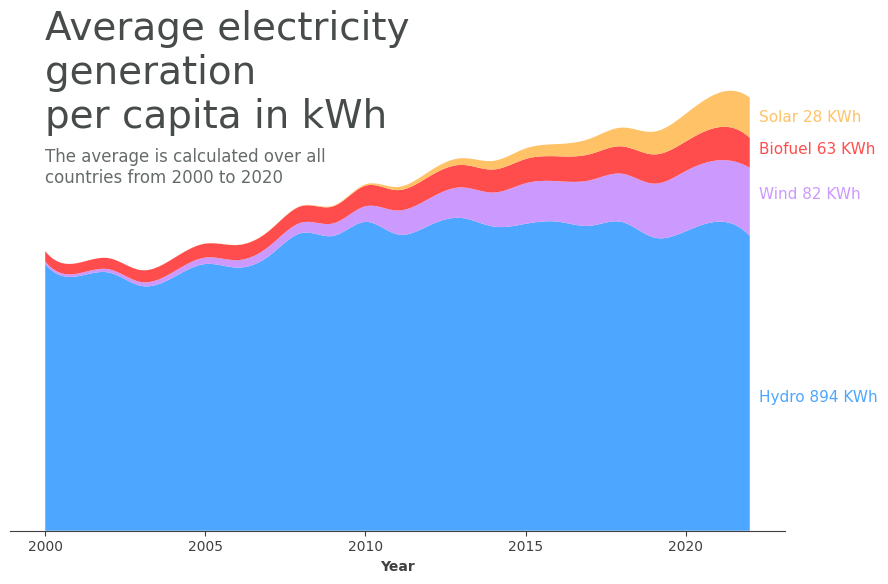

In [7]:
import numpy as np
from scipy.interpolate import make_interp_spline

df_filtered_2 = df_filtered[['country', 'year'] + [col for col in df_filtered.columns if col.endswith('elec_per_capita')]]

dict_renewables = {}
for years in df_filtered_2['year'].unique():
    df_renewables = df_filtered_2[df_filtered_2['year'] == years]
    avg_value_biofuel = df_renewables['biofuel_elec_per_capita'].mean()
    avg_value_hydro = df_renewables['hydro_elec_per_capita'].mean()
    avg_value_solar = df_renewables['solar_elec_per_capita'].mean()
    avg_value_wind = df_renewables['wind_elec_per_capita'].mean()


    dict_renewables[str(years)] = (float(avg_value_hydro),
                                   float(avg_value_wind),
                                   float(avg_value_biofuel),
                                   float(avg_value_solar))

    df_renewables_final = pd.DataFrame.from_dict(dict_renewables,
                                                 orient='index',
                                                 columns=['hydro',
                                                          'wind',
                                                          'biofuel',
                                                          'solar'])

df_renewables_final.reset_index(inplace=True)
df_renewables_final.rename(columns={'index': 'year'}, inplace=True)

df_renewables_final['year'] = df_renewables_final['year'].astype(int)
df_renewables_final = df_renewables_final.set_index('year')



# Smooth x values
x_smooth = np.linspace(df_renewables_final.index.min(), df_renewables_final.index.max(), 300)

# Interpolate each series using B-splines
smoothed_data = []
for col in df_renewables_final.columns:
    spline = make_interp_spline(df_renewables_final.index, df_renewables_final[col])
    smoothed_y = spline(x_smooth)
    smoothed_data.append(smoothed_y)


fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(x_smooth,
             smoothed_data,
             labels=df_renewables_final.columns,
             colors = ['#4da6ff', '#cc99ff', '#ff4d4d', '#ffc266'])

ax.set_xlabel('Year',
              loc = 'center',
              fontdict = {'fontsize':'10',
                          'fontfamily':'sans-serif',
                          'fontweight':'bold'},
              color = '#404040')


ax.spines[['top','right', 'left']].set_visible(False)
ax.spines[['bottom','left']].set_color('#404040')
ax.set_yticks([])


ax.tick_params(axis='x', colors='#404040')



#hydro
ax.text(2022.3,400,'Hydro 894 KWh',
        rotation = 0,
        color = '#4da6ff',
        fontfamily = 'sans-serif',
        fontsize = 11,
        fontweight = 12)

#biofuel
ax.text(2022.3,1030,'Wind 82 KWh',
        rotation = 0,
        color = '#cc99ff',
        fontfamily = 'sans-serif',
        fontsize = 11,
        fontweight = 12)

#solar
ax.text(2022.3,1170,'Biofuel 63 KWh',
        rotation = 0,
        color = '#ff4d4d',
        fontfamily = 'sans-serif',
        fontsize = 11,
        fontweight = 12)

#wind
ax.text(2022.3,1270,'Solar 28 KWh',
        rotation = 0,
        color = '#ffc266',
        fontfamily = 'sans-serif',
        fontsize = 11,
        fontweight = 12)

#title
ax.text(2000,
        1250,
        'Average electricity \ngeneration \nper capita in kWh',
        fontsize = 28,
        fontweight = 20,
        color = '#474c4b',
        fontfamily = 'sans-serif')

ax.text(2000,
        1080,
        'The average is calculated over all \ncountries from 2000 to 2020',
        fontsize = 12,
        fontweight = 4,
        color = '#656b6a',
        fontfamily = 'sans-serif')


# Comparison of countries

In [10]:
top_9_countries = df_filtered[['country', 'greenhouse_gas_emissions']] \
                   .groupby('country')['greenhouse_gas_emissions'] \
                   .max() \
                   .sort_values(ascending = False) \
                   .head(12) \
                   .index.tolist()

countries_to_select = ['India', 'China', 'Japan',
                       'Germany', 'Russia', 'South Africa',
                       'Indonesia', 'United Kingdom', 'United States']

df_countries = df_filtered[df_filtered['country'].isin(countries_to_select)]

df_countries = df_countries[['country', 'year'] + [col for col in df_countries.columns \
                                                   if col.endswith('_share_elec') \
                                                   and (col.startswith('biofuel') \
                                                   or col.startswith('hydro') \
                                                   or col.startswith('wind') \
                                                   or col.startswith('solar') \
                                                   or col.startswith('fossil') \
                                                   or col.startswith('renewables'))]]

df_countries = df_countries[['country', 'year', 'fossil_share_elec', 'renewables_share_elec']]



,country,year,fossil_share_elec,renewables_share_elec
4482,China,2000,82.126,16.639
4483,China,2001,79.862,18.958
4484,China,2002,80.862,17.618
4485,China,2003,82.695,15.036
4486,China,2004,81.487,16.222
...,...,...,...,...
20487,United States,2018,63.341,17.450
20488,United States,2019,62.241,18.295
20489,United States,2020,60.148,20.316
20490,United States,2021,60.487,20.743


In [11]:
!pip install drawarrow

In [12]:
!pip install highlight_text

<ipython-input-35-2407730693>:83: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  str(int(first_value_fossil)) + '%',
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/usr/local/lib/python3.11/dist-packages/matplotl

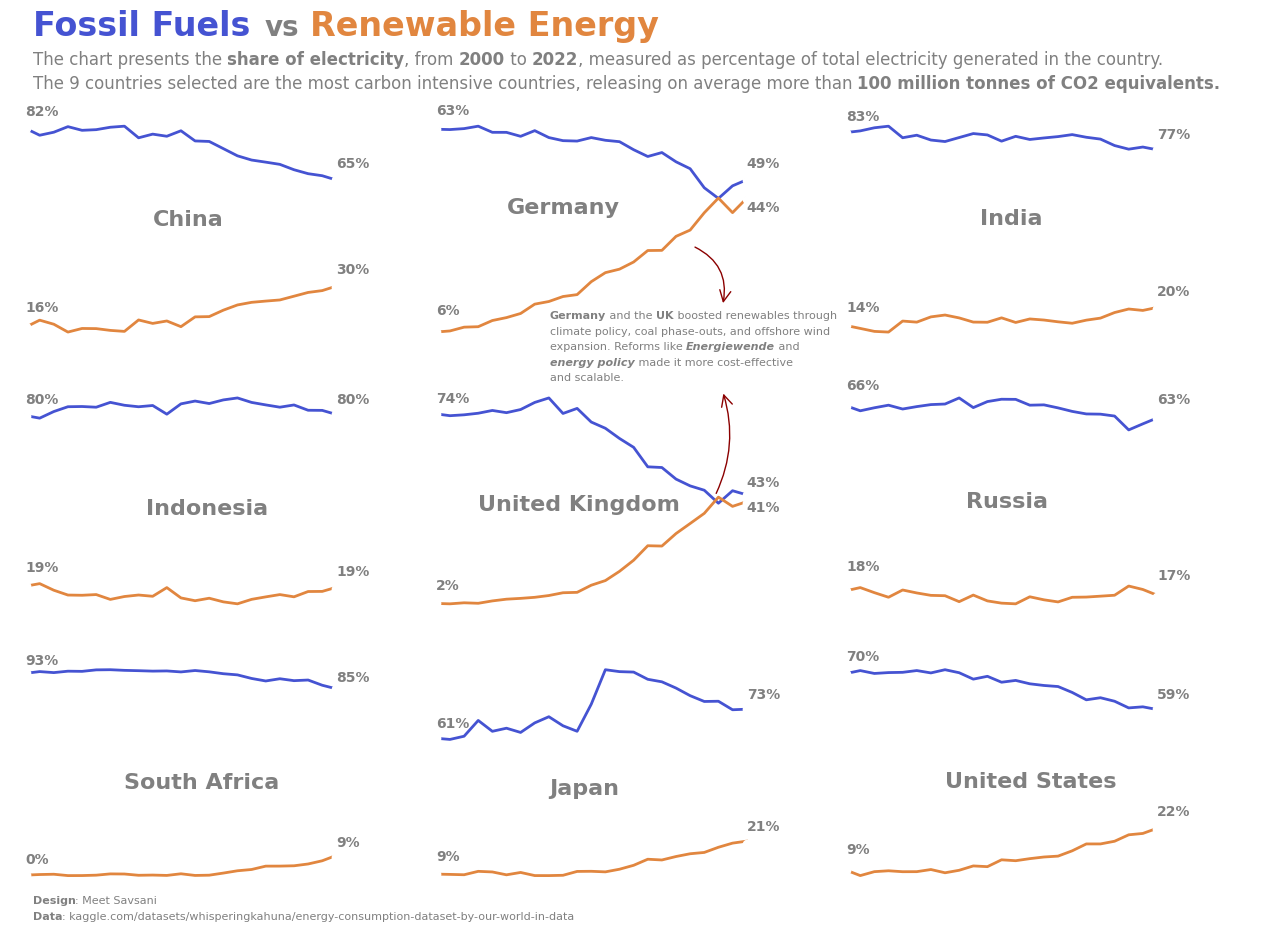

<Figure size 640x480 with 0 Axes>

In [35]:
from highlight_text import fig_text
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
from drawarrow import fig_arrow

# arrows
from matplotlib.patches import FancyArrowPatch

top_9_countries = df_filtered[['country', 'greenhouse_gas_emissions']] \
                   .groupby('country')['greenhouse_gas_emissions'] \
                   .max() \
                   .sort_values(ascending = False) \
                   .head(12) \
                   .index.tolist()

countries_to_select = ['India', 'China', 'Japan',
                       'Germany', 'Russia', 'South Africa',
                       'Indonesia', 'United Kingdom', 'United States']

df_countries = df_filtered[df_filtered['country'].isin(countries_to_select)]

df_countries = df_countries[['country', 'year'] + [col for col in df_countries.columns \
                                                   if col.endswith('_share_elec') \
                                                   and (col.startswith('biofuel') \
                                                   or col.startswith('hydro') \
                                                   or col.startswith('wind') \
                                                   or col.startswith('solar') \
                                                   or col.startswith('fossil') \
                                                   or col.startswith('renewables'))]]

df_countries = df_countries[['country', 'year', 'fossil_share_elec', 'renewables_share_elec']]


df_country_copy = df_countries.copy()
selected_countries = df_country_copy['country'].dropna().unique()[:9]
selected_countries[4], selected_countries[7] = selected_countries[7], selected_countries[4]
background_color = '#ffffff'
renewable_color = '#e1863f'
fossil_color = '#4553d2',
country_color = 'grey'

#------------------- GRID SETUP ---------------------------#
# Set up the 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
fig.set_facecolor(background_color)
plt.rcParams['text.usetex'] = False
axes = axes.flatten()


#------------------- PLOTTING DATA ------------------------#
# Plot data for each country
for ax, country in zip(axes, selected_countries):
    data = df_country_copy[df_country_copy['country'] == country].sort_values('year')

    #Calculating First and the last value
    first_value_fossil = df_country_copy[df_country_copy['country'] == country][0:1].fossil_share_elec
    last_value_fossil = df_country_copy[df_country_copy['country'] == country][-1:].fossil_share_elec
    first_value_renewable = df_country_copy[df_country_copy['country'] == country][0:1].renewables_share_elec
    last_value_renewable = df_country_copy[df_country_copy['country'] == country][-1:].renewables_share_elec

    #Setting the background colour
    ax.set_facecolor(background_color)

    #Plotting lines
    ax.plot(data['year'],
            data['fossil_share_elec'],
            color = '#4553d2',
            linewidth = 2.0)
    ax.plot(data['year'],
            data['renewables_share_elec'],
            color = renewable_color,
            linewidth = 2.0)

    #Marking the First and the Last Value of Fossil Fuel
    ax.plot(2000, first_value_fossil, 'o', color = 'white')
    ax.plot(2022, last_value_fossil, 'o', color = 'white')

#--------------- ANNOTATION ---------------------------------

    #Annotating First and Last Fossil Value
    ax.text(2000,
            first_value_fossil + 4,
            str(int(first_value_fossil)) + '%',
            color = 'grey',
            fontweight = 600)

    ax.text(2022,
            int(last_value_fossil.iloc[0]) + 4,
            str(int(last_value_fossil.iloc[0])) + '%',
            color = 'grey',
            fontweight = 600)


    #Marking the first and the last value for Renewables
    ax.plot(2000, first_value_renewable, 'o', color = 'white')
    ax.plot(2022, int(last_value_renewable.iloc[0]), 'o', color = 'white')


    #Country wise annotation for Renewables
    if country in ['United Kingdom', 'Germany']:
            ax.text(2022,
                    last_value_renewable - 4,
                    str(int(last_value_renewable.iloc[0])) + '%',
                    color = 'grey',
                    fontweight = 600
                    )

            ax.text(2000,
                    first_value_renewable + 5,
                    str(int(first_value_renewable.iloc[0])) + '%',
                    color = 'grey',
                    fontweight = 600)



    else:
      ax.text(2000,
              first_value_renewable + 5,
              str(int(first_value_renewable.iloc[0])) + '%',
              color = 'grey',
              fontweight = 600)

      ax.text(2022,
              last_value_renewable + 4,
              str(int(last_value_renewable.iloc[0])) + '%',
              color = 'grey',
              fontweight = 600)


    #Adding the country names
    if country == 'China':
      ax.text(2009,50,
              country,
              fontsize = 16,
              fontweight = 600,
              color = country_color)

    elif country == 'Germany':
      ax.text(2005,40,
              country,
              fontsize = 16,
              fontweight = 600,
              color = country_color)

    elif country == 'India':
      ax.text(2009.5,50,
              country,
              fontsize = 16,
              fontweight = 600,
              color = country_color)

    elif country == 'Indonesia':
      ax.text(2008.5,45,
              country,
              fontsize = 16,
              fontweight = 600,
              color = country_color)

    elif country == 'Japan':
      ax.text(2008,40,
              country,
              fontsize = 16,
              fontweight = 600,
              color = country_color)

    elif country == 'Russia':
      ax.text(2008.5,40,
              country,
              fontsize = 16,
              fontweight = 600,
              color = country_color)

    elif country == 'South Africa':
      ax.text(2007,40,
              country,
              fontsize = 16,
              fontweight = 600,
              color = country_color)

    elif country == 'United Kingdom':
      ax.text(2003,38,
              country,
              fontsize = 16,
              fontweight = 600,
              color = country_color)

    elif country == 'United States':
      ax.text(2007,35,
              country,
              fontsize = 16,
              fontweight = 600,
              color = country_color)

    ax.set_axis_off()




secondary_title = 'The chart presents the <share of electricity>, from <2000> to <2022>, measured as percentage of total electricity generated in the country. \
                   \nThe 9 countries selected are the most carbon intensive countries, releasing on average more than <100 million tonnes of CO2 equivalents.>'
#adding the title
fig.text(0.14,0.96,'Fossil Fuels',
              fontsize=24,
              fontweight = 650,
              color='#4553d2')

fig.text(0.295, 0.96,'vs',
              fontsize=20,
              fontweight = 600,
              color='gray')

fig.text(0.325, 0.96,'Renewable Energy',
              fontweight = 650,
              fontsize=24,
              color ='#e1863f')

fig_text(0.14,
         0.945,
         secondary_title,
         highlight_textprops=[
        {"color": "grey", "fontweight": 600},
        {"color": "grey", "fontweight": 600},
        {"color": "grey", "fontweight": 600},
        {"color":"grey", "fontweight":600}],
         fontsize=12,
         color='grey')



annotation_text = '<Germany> and the <UK> boosted renewables through\nclimate policy, coal phase-outs, and offshore wind \nexpansion. Reforms like <Energiewende> and\n<energy policy> made it more cost-effective\nand scalable.'

#for germany
fig_arrow(
    head_position=(0.60, 0.69),
    tail_position=(0.58, 0.75),
    width=1,
    radius=-0.4,
    color="darkred",
    fill_head=False,
    mutation_scale=1,
)

#for uk
fig_arrow(
    head_position=(0.60, 0.605),
    tail_position=(0.595, 0.50),
    width=1,
    radius=0.2,
    color="darkred",
    fill_head=False,
    mutation_scale=1,
)
fig_text(
   0.485, 0.685,
   annotation_text,
   fontsize=8,
   color='grey',
   highlight_textprops=[
      {'fontweight':600},
      {'fontweight':600},
      {'fontweight':600,'style':'italic'},
      {'fontweight':600,'style':'italic'}
   ]
)


credit_text = '<Design>: Meet Savsani\n<Data>: kaggle.com/datasets/whisperingkahuna/energy-consumption-dataset-by-our-world-in-data'

fig_text(
   0.14, 0.1,
   credit_text,
   fontsize=8,
   color='grey',
   highlight_textprops=[
      {'fontweight':600},
      {'fontweight':600}
   ]
)

plt.savefig("final_plot.jpg", dpi = 500, bbox_inches = 'tight')
plt.show()
plt.tight_layout()
plt.show()

<ipython-input-14-3620649769>:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


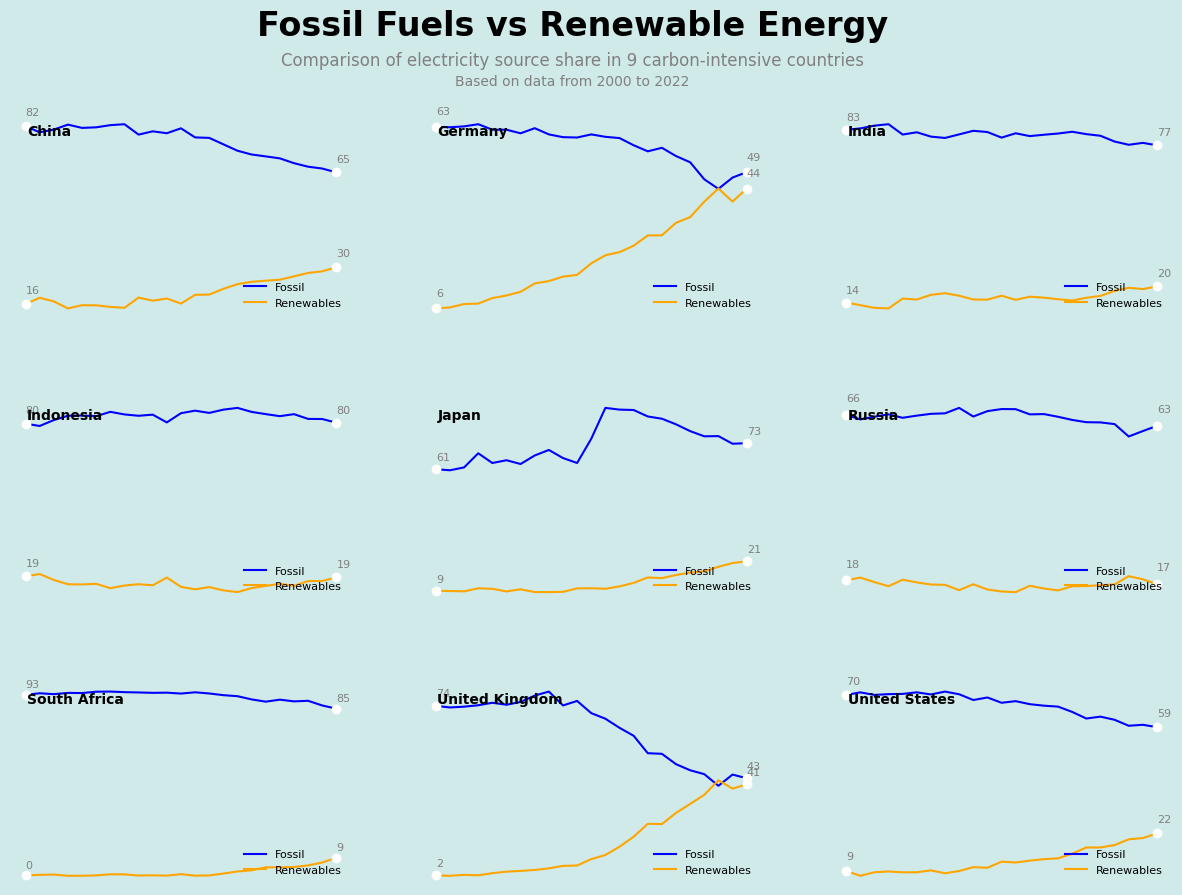

In [14]:
import matplotlib.pyplot as plt

# Turn off LaTeX rendering just to be safe
plt.rcParams['text.usetex'] = False

# Copy data
df_country_copy = df_countries.copy()
selected_countries = df_country_copy['country'].dropna().unique()[:9]
background_color = '#d0eaea'

#------------------- GRID SETUP ---------------------------#
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
fig.set_facecolor(background_color)
axes = axes.flatten()

#------------------- TITLE & CONTEXT ----------------------#
fig.text(0.5, 0.96, 'Fossil Fuels vs Renewable Energy',
         ha='center', fontsize=24, fontweight='bold', color='black')

fig.text(0.5, 0.93, 'Comparison of electricity source share in 9 carbon-intensive countries',
         ha='center', fontsize=12, color='gray')

fig.text(0.5, 0.91, 'Based on data from 2000 to 2022',
         ha='center', fontsize=10, color='gray')

#------------------- PLOTTING DATA ------------------------#
for ax, country in zip(axes, selected_countries):
    data = df_country_copy[df_country_copy['country'] == country].sort_values('year')

    # Extract first/last values for fossil and renewables
    first_value_fossil = data.iloc[0].fossil_share_elec
    last_value_fossil = data.iloc[-1].fossil_share_elec
    first_value_renewable = data.iloc[0].renewables_share_elec
    last_value_renewable = data.iloc[-1].renewables_share_elec

    # Background
    ax.set_facecolor(background_color)

    # Plotting lines
    ax.plot(data['year'], data['fossil_share_elec'], color='blue', label='Fossil')
    ax.plot(data['year'], data['renewables_share_elec'], color='orange', label='Renewables')

    # Markers for fossil values
    ax.plot(2000, first_value_fossil, 'o', color='white')
    ax.plot(2022, last_value_fossil, 'o', color='white')

    # Fossil annotations
    ax.text(2000, first_value_fossil + 4,
            int(first_value_fossil), color='gray', fontsize=8)
    ax.text(2022, last_value_fossil + 4,
            int(last_value_fossil), color='gray', fontsize=8)

    # Markers for renewables
    ax.plot(2000, first_value_renewable, 'o', color='white')
    ax.plot(2022, last_value_renewable, 'o', color='white')

    # Renewable annotations
    ax.text(2000, first_value_renewable + 4,
            int(first_value_renewable), color='gray', fontsize=8)
    ax.text(2022, last_value_renewable + 4,
            int(last_value_renewable), color='gray', fontsize=8)

    # Country label (top-left corner of each subplot)
    ax.text(0.05, 0.9, country,
            transform=ax.transAxes,
            fontsize=10, fontweight='bold', color='black')

    # Add legend
    ax.legend(loc='lower right', fontsize=8, frameon=False)

    # Hide axes
    ax.set_axis_off()

#------------------- LAYOUT TWEAKS ------------------------#
plt.tight_layout()
plt.subplots_adjust(top=0.88, hspace=0.4)

plt.show()
